DL Lab Practical 2

AdaGrad Implementation 

Name: Aashi Khanna


Write a program to implement AdaGrad for the following objective functions:


1.   x^2
2.   x^2 + y^2



**1) x^2**

>0 f([-0.065956    0.54064898]) = 0.00435
>1 f([-0.02902286  0.57758212]) = 0.00084
>2 f([-0.0129815   0.59362348]) = 0.00017
>3 f([-0.00582483  0.60078015]) = 0.00003
>4 f([-0.00261527  0.60398971]) = 0.00001
>5 f([-0.00117437  0.60543061]) = 0.00000
>6 f([-5.27357554e-04  6.06077620e-01]) = 0.00000
>7 f([-2.36813933e-04  6.06368164e-01]) = 0.00000
>8 f([-1.06343215e-04  6.06498634e-01]) = 0.00000
>9 f([-4.77542918e-05  6.06557223e-01]) = 0.00000
>10 f([-2.14444569e-05  6.06583533e-01]) = 0.00000
>11 f([-9.62980957e-06  6.06595348e-01]) = 0.00000
>12 f([-4.32434511e-06  6.06600653e-01]) = 0.00000
>13 f([-1.94188271e-06  6.06603036e-01]) = 0.00000
>14 f([-8.72018386e-07  6.06604105e-01]) = 0.00000
>15 f([-3.91587022e-07  6.06604586e-01]) = 0.00000
>16 f([-1.75845370e-07  6.06604802e-01]) = 0.00000
>17 f([-7.89648082e-08  6.06604899e-01]) = 0.00000
>18 f([-3.54597960e-08  6.06604942e-01]) = 0.00000
>19 f([-1.59235128e-08  6.06604962e-01]) = 0.00000
>20 f([-7.15058425e-09  6.06604970e-01

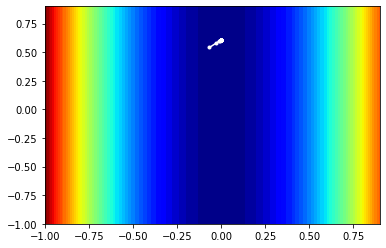

In [ ]:

from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

def objective(x):
	return x**2

def derivative(x):
	return asarray([x]* 2)

def adagrad(objective, derivative, bounds, n_iter, step_size):
	
  # track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of the sum square gradients for each variable
	sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
	
	for it in range(n_iter):
		# calculate gradient
		gradient = derivative(solution[0])
		# update the sum of the squared partial derivatives
		for i in range(gradient.shape[0]):
			sq_grad_sums[i] += gradient[i]**2.0
		
		new_solution = list()
		for i in range(solution.shape[0]):
			#learning rate for this variable
			alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
			#new position in this variable
			value = solution[i] - alpha * gradient[i]
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0])
		
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions


seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 50
step_size = 0.1
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()

**2) x^2 + y^2**

>0 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.02902286  0.27948766]) = 0.07896
>2 f([-0.0129815   0.23463749]) = 0.05522
>3 f([-0.00582483  0.1993997 ]) = 0.03979
>4 f([-0.00261527  0.17071256]) = 0.02915
>5 f([-0.00117437  0.14686138]) = 0.02157
>6 f([-0.00052736  0.12676134]) = 0.01607
>7 f([-0.00023681  0.10966762]) = 0.01203
>8 f([-0.00010634  0.09503809]) = 0.00903
>9 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
>10 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
>11 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
>12 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
>13 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
>14 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
>15 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
>16 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
>17 f([-7.89647442e-08  2.69937139e-02]) = 0.00073
>18 f([-3.54597657e-08  2.34988084e-02]) = 0.00055
>19 f([-1.59234984e-08  2.04577993e-02]) = 0.00042
>20 f([-7.15057749e-09  1.78112581e-02]) = 0.00032
>21 f([-3.2

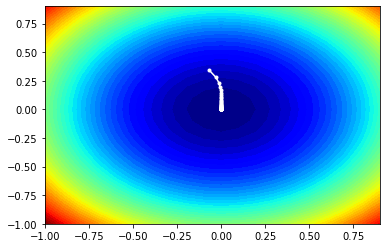

In [ ]:
def objective(x, y):
	return x**2.0 + y**2.0

def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

def adagrad(objective, derivative, bounds, n_iter, step_size):
	solutions = list()
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
	
	for it in range(n_iter):
		gradient = derivative(solution[0], solution[1])
		
		for i in range(gradient.shape[0]):
			sq_grad_sums[i] += gradient[i]**2.0
		
		new_solution = list()
		for i in range(solution.shape[0]):
			alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
			value = solution[i] - alpha * gradient[i]
			new_solution.append(value)
		
		solution = asarray(new_solution)
		solutions.append(solution)
		solution_eval = objective(solution[0], solution[1])
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions


seed(1)
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 50
step_size = 0.1
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)

xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
pyplot.show()

<ipython-input-3-2a5da2a97cd0>:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


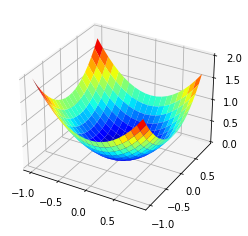

In [ ]:
## 3D plot
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 
# objective function
def objective(x, y):
 return x**2.0 + y**2.0
 
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()